<a href="https://colab.research.google.com/github/nuckleheadninja/MSE2AI/blob/main/AI_MSE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
              precision    recall  f1-score   support

        high       0.50      0.50      0.50         8
         low       0.40      0.80      0.53         5
      medium       0.50      0.14      0.22         7

    accuracy                           0.45        20
   macro avg       0.47      0.48      0.42        20
weighted avg       0.47      0.45      0.41        20



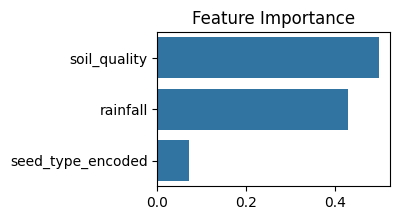

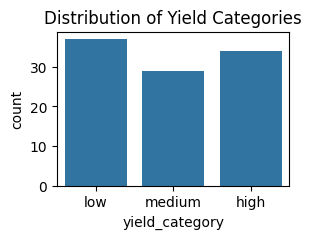

Enter soil quality: 54522023.265
Enter rainfall amount: 789524.336
Enter seed type: A
Predicted Yield Category: high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


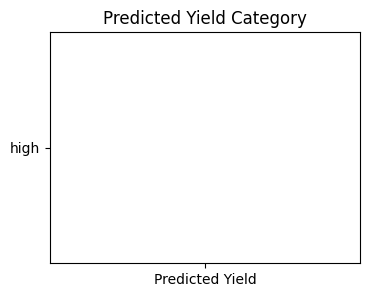

In [12]:
#importiing all the essential libraries for the visualization and prediction of data set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset that we have provided
df = pd.read_csv("crop_yield.csv")  # Make sure the CSV is in the same directory otherwise it will show file not found error

# Encode categorical columns
label_encoder_seed = LabelEncoder()#for the reading of the seed type coloumn
label_encoder_yield = LabelEncoder()#for readig of yield
df['seed_type_encoded'] = label_encoder_seed.fit_transform(df['seed_type'])
df['yield_category_encoded'] = label_encoder_yield.fit_transform(df['yield_category'])

# Define features and targets
X = df[['soil_quality', 'rainfall', 'seed_type_encoded']]
y = df['yield_category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_yield.classes_))

# Visualization 1: Feature Importance
importances = model.feature_importances_
features = ['soil_quality', 'rainfall', 'seed_type_encoded']
plt.figure(figsize=(3, 2))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

# Visualization 2: Distribution of Yield Categories
plt.figure(figsize=(3, 2))
sns.countplot(x='yield_category', data=df)
plt.title('Distribution of Yield Categories')
plt.show()

# Prediction function
def predict_yield_category(soil_quality, rainfall, seed_type):
    if seed_type not in label_encoder_seed.classes_:
        raise ValueError(f"Invalid seed type. Choose from: {list(label_encoder_seed.classes_)}")
    seed_type_encoded = label_encoder_seed.transform([seed_type])[0]
    features = [[soil_quality, rainfall, seed_type_encoded]]
    prediction_encoded = model.predict(features)[0]
    prediction_label = label_encoder_yield.inverse_transform([prediction_encoded])[0]
    return prediction_label

# User input,it takes input from user and predict according to that
soil_quality = float(input("Enter soil quality: "))
rainfall = float(input("Enter rainfall amount: "))
seed_type = input("Enter seed type: ")

# Predict and display result
try:
    prediction = predict_yield_category(soil_quality, rainfall, seed_type)
    print(f"Predicted Yield Category: {prediction}")
except ValueError as e:
    print(e)
    prediction = None  # Handle the case where prediction fails

# Visualization 3: Predicted Yield Category (moved outside the try-except block)
if prediction is not None:  # Only visualize if prediction was successful
    plt.figure(figsize=(4, 3))
    sns.barplot(x=['Predicted Yield'], y=[prediction])
    plt.title('Predicted Yield Category')
    plt.show()
